In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from glob import glob

In [2]:
cumulative_cases = []
date = []

In [3]:
#No New York cases from Jan22 to MAR01

filenames = sorted(glob('*2020a.txt'))
dataframes = [pd.read_csv(f) for f in filenames]

for dataframe in dataframes:
    d1 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d1 = d1.drop(d1[d1['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d1['Confirmed'].sum())
    
for filename in filenames:
    date.append(filename[0:5])

In [4]:
#MAR02-MAR09

filenames2 = sorted(glob('*2020b.txt'))
dataframes2 = [pd.read_csv(f) for f in filenames2]

for dataframe in dataframes2:
    d2 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d2 = d2.drop(d2[d2['Province/State'].str.contains('NY')].index)
    d2 = d2.drop(d2[d2['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d2['Confirmed'].sum())
    
for filename in filenames2:
    date.append(filename[0:5])

In [5]:
#Johns Hopkins change in New York notation MAR10-MAR21

filenames3 = sorted(glob('*2020c.txt'))
dataframes3 = [pd.read_csv(f) for f in filenames3]

for dataframe in dataframes3:
    d3 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d3 = d3.drop(d3[d3['Province/State'].str.contains('New York')].index)
    d3 = d3.drop(d3[d3['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d3['Confirmed'].sum())
    
for filename in filenames3:
    date.append(filename[0:5])

In [6]:
#Johns Hopskin change in column notation MAR22-Present

filenames4 = sorted(glob('*2020d.txt'))
dataframes4 = [pd.read_csv(f) for f in filenames4]

for dataframe in dataframes4:
    d4 = dataframe.loc[dataframe['Country_Region'] == 'US']
    d4 = d4.drop(d4[d4['Province_State'].str.contains('New York')].index)
    d4 = d4.drop(d4[d4['Province_State'].str.contains('Princess')].index)
    d4 = d4.drop(d4[d4['Province_State'].str.contains('Military')].index)
    cumulative_cases.append(d4['Confirmed'].sum())
    
for filename in filenames4:
    date.append(filename[0:5])

In [7]:
print(len(cumulative_cases))
print(len(date))

96
96


In [8]:
US_cases_minus_NY = pd.DataFrame(list(zip(date, cumulative_cases)))
US_cases_minus_NY.columns = ['date', 'cumulative_cases']
US_cases_minus_NY['daily_new_cases'] = US_cases_minus_NY['cumulative_cases'].diff(1)

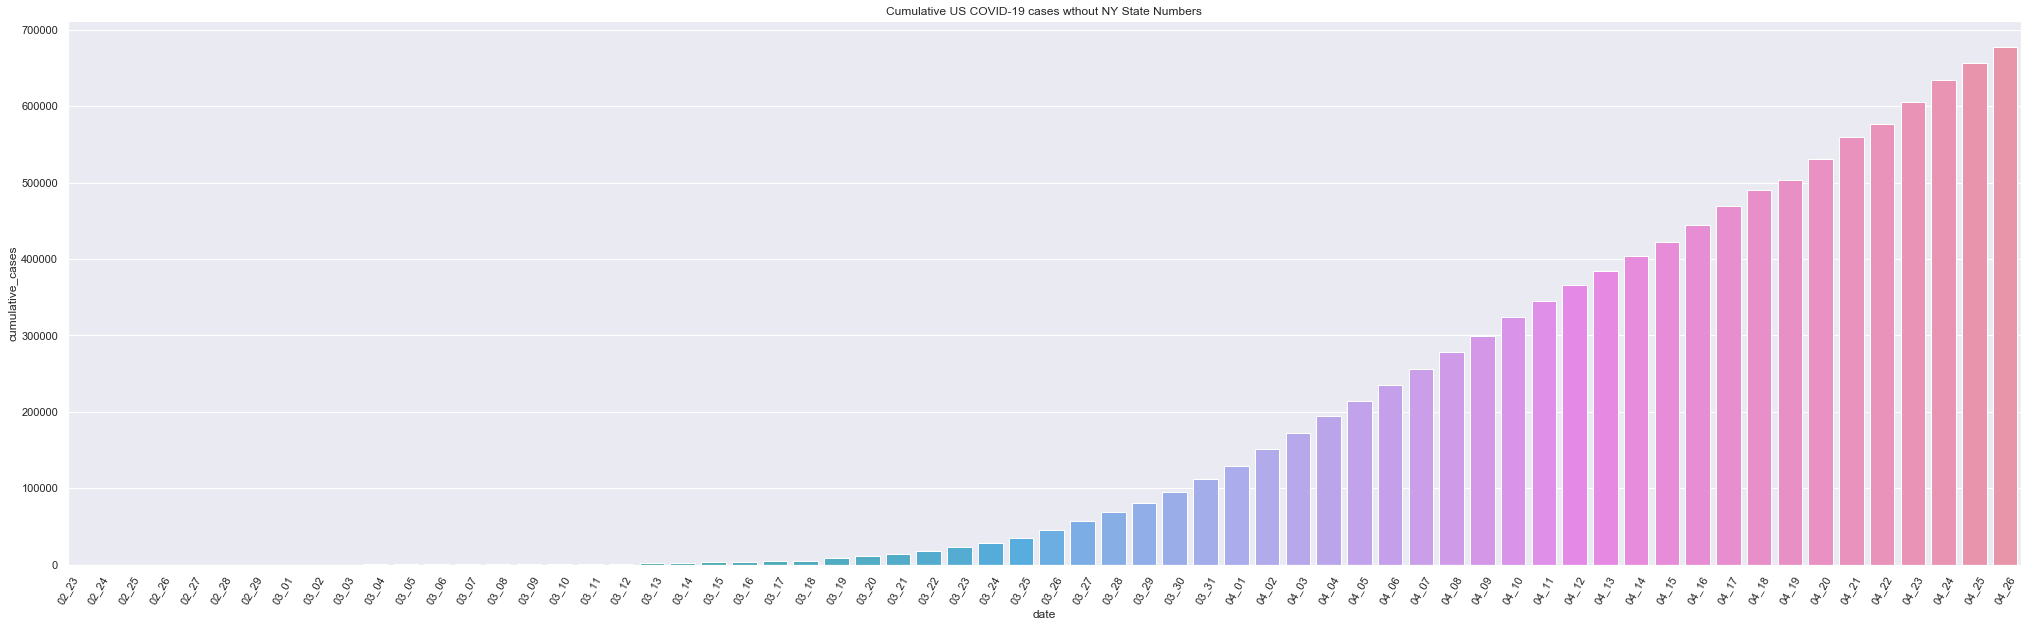

In [9]:
plt.figure(figsize=(35, 10))
#sns.palplot(sns.light_palette("gray"))
US_cumulative_plot_no_NY = sns.barplot(x='date', y='cumulative_cases', data=US_cases_minus_NY)
plt.xticks(rotation=60)
plt.xlim(32)
plt.title('Cumulative US COVID-19 cases wthout NY State Numbers')
plt.savefig('Cumulative US COVID-19 cases wthout NY State Numbers')
plt.show()

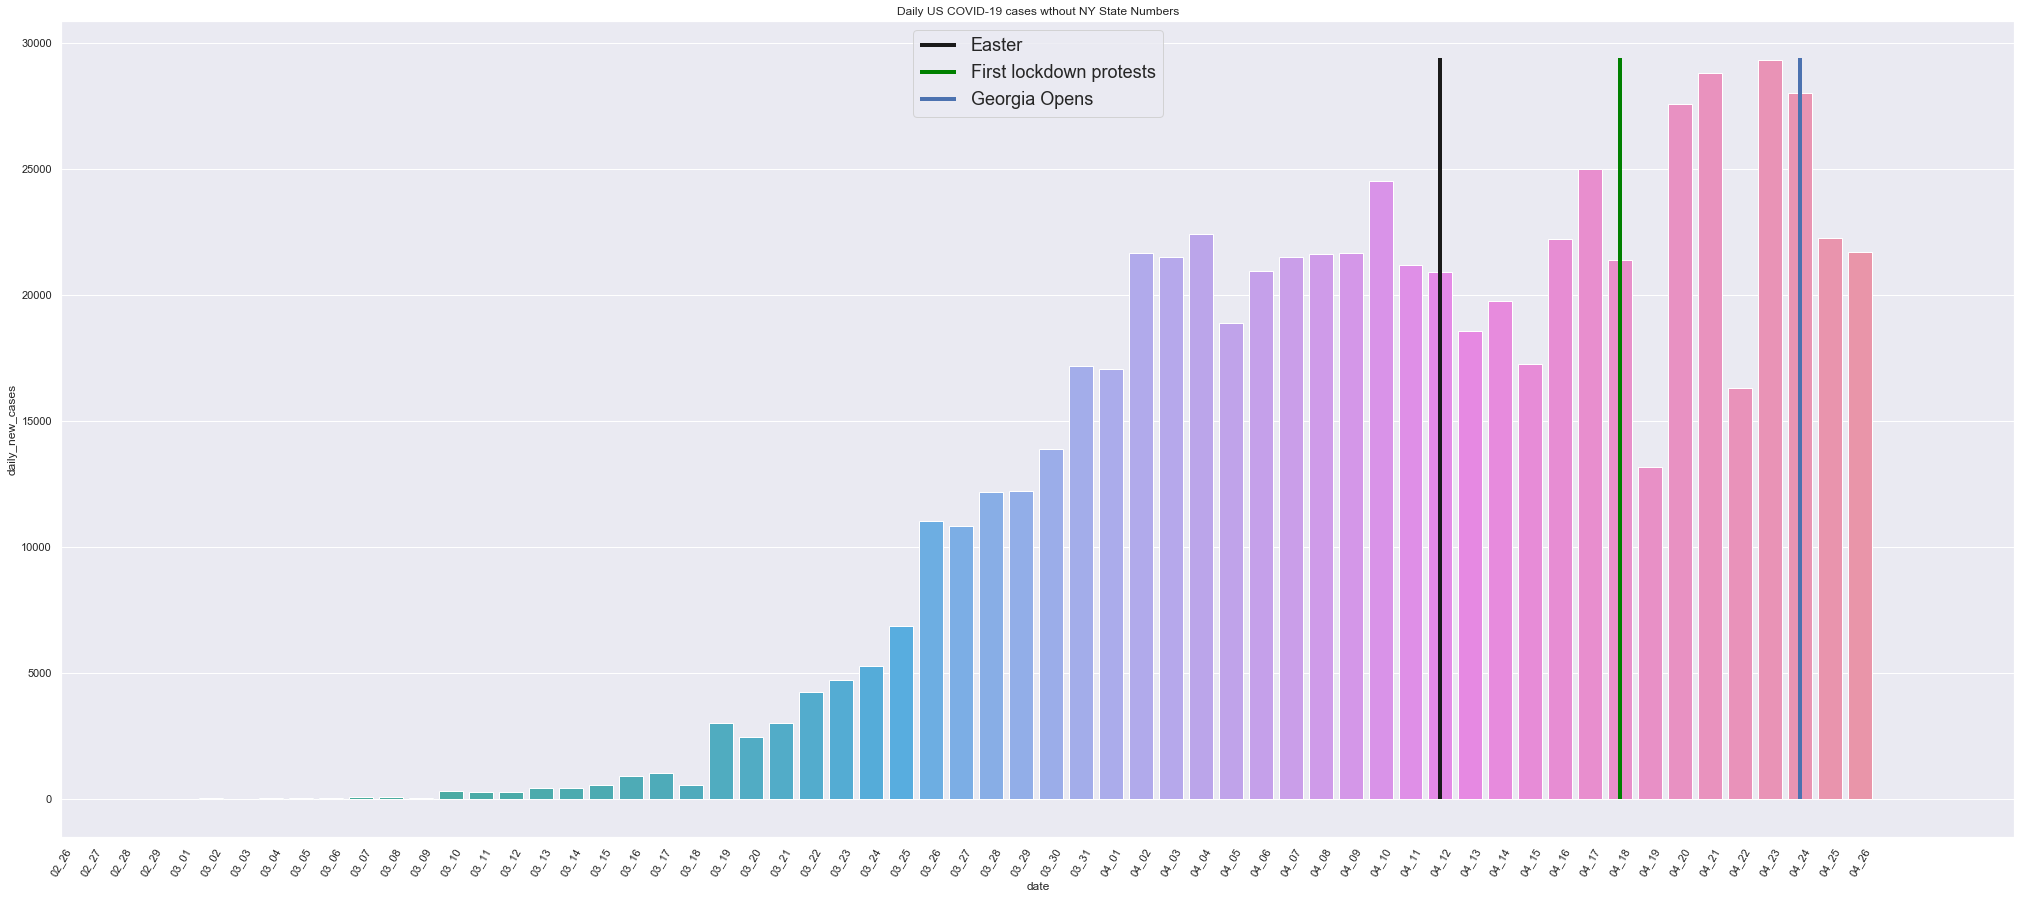

In [10]:
plt.figure(figsize=(35, 15))
US_daily_plot_no_NY = sns.barplot(x='date', y='daily_new_cases', data=US_cases_minus_NY)
plt.xticks(rotation=60)
plt.title('Daily US COVID-19 cases wthout NY State Numbers')
plt.vlines(x=81, ymin=0, ymax=29400, color='k', linewidths=4, label='Easter')
plt.vlines(x=87, ymin=0, ymax=29400, color='green', linewidths=4, label='First lockdown protests')
plt.vlines(x=93, ymin=0, ymax=29400, color='b', linewidths=4, label='Georgia Opens')
#plt.hlines(y=29400, xmin=81, xmax=92, color='r', linestyle='dashed', label='11 days')
plt.xlim(35)
plt.legend(loc='upper center', fontsize=18)
plt.savefig('Daily US COVID-19 cases wthout NY State Numbers')
plt.show()